# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD J Term 2023


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

This material was developed with Jung Min Han

---

PART 02 Programming Data Processing

# LAB 05 Pandas & Numpy Example: Data Cleaning

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor as KNN
%matplotlib inline

import pandas as pd
import numpy as np
import os, random
import sklearn
print (sklearn.__version__)

1.0.2


In [64]:
index = [
    'program', 'age', 'gender', 'year', 'grade', ' name'
]
data = [
    ['MDes', 30, 'male', 2017, 'b', 'nj'],
    ['MArch', 30, 'female', 2020, 'c', 'dj'],
    ['MDes', 32, 'male', 2019, 'a', 'mj'],
    ['MAUD', 25, 'NA', 2023, 'b', 'mj'],
    [ None, 3, 'NA', 1009, 'a', 'jj'],
]

df = pd.DataFrame(data)
df.columns= index
df

,program,age,gender,year,grade,name
0,MDes,30,male,2017,b,nj
1,MArch,30,female,2020,c,dj
2,MDes,32,male,2019,a,mj
3,MAUD,25,NA,2023,b,mj
4,None,3,NA,1009,a,jj


In [65]:
df['gender'].unique()

array(['male', 'female', 'NA'], dtype=object)

In [66]:
df.loc[df['gender']=='NA', ['gender']] = np.nan
df.loc[df['year']<2000, ['year']] = np.nan
df.loc[df['age']<20, ['age']] = np.nan

In [67]:
df

,program,age,gender,year,grade,name
0,MDes,30.0,male,2017.0,b,nj
1,MArch,30.0,female,2020.0,c,dj
2,MDes,32.0,male,2019.0,a,mj
3,MAUD,25.0,NaN,2023.0,b,mj
4,None,NaN,NaN,NaN,a,jj


In [68]:
df.dropna(axis=0)


,program,age,gender,year,grade,name
0,MDes,30.0,male,2017.0,b,nj
1,MArch,30.0,female,2020.0,c,dj
2,MDes,32.0,male,2019.0,a,mj


In [69]:
df.dropna(axis=1)

,grade,name
0,b,nj
1,c,dj
2,a,mj
3,b,mj
4,a,jj


In [70]:
df.dropna(axis=0, thresh=1)

,program,age,gender,year,grade,name
0,MDes,30.0,male,2017.0,b,nj
1,MArch,30.0,female,2020.0,c,dj
2,MDes,32.0,male,2019.0,a,mj
3,MAUD,25.0,NaN,2023.0,b,mj
4,None,NaN,NaN,NaN,a,jj


In [72]:
default = {
    'program' : 'GSD',
    'age': 20, 
    'gender': 'undefined', 
    'year' : 2000,
    'name': 'student'
    }
df_processed = df.fillna(value = default)
df_processed


,program,age,gender,year,grade,name
0,MDes,30.0,male,2017.0,b,nj
1,MArch,30.0,female,2020.0,c,dj
2,MDes,32.0,male,2019.0,a,mj
3,MAUD,25.0,undefined,2023.0,b,mj
4,GSD,20.0,undefined,2000.0,a,jj


### Data Cleaning and Visualization

Getting Data

In [3]:
def GetPandasFromFileCSV(path):
    return pd.read_csv(path, delimiter=',')

def GetPandasFromFile(path, theSkipRow):
    return pd.read_csv(path, skiprows= theSkipRow , header=None)

In [4]:
#  http://www.njstudio.co.kr/main/project/2016_HarvardCS109_DataScience/DataExploration.html

df =GetPandasFromFileCSV("data/RentPriceTruliaMergeFinal.csv")
print (df )

       pixelPlant  pixelPole  pixelLake  pixelRoad  pixelGrass  pixelWall  \
0             0.0      0.000     60.990      2.671         0.0      2.116   
1             0.0      0.004     34.120      0.217         0.0      4.409   
2             0.0      0.000      0.000      0.000         0.0      0.000   
3             0.0      0.000     37.650      1.242         0.0      0.694   
4             0.0      0.000     37.650      1.242         0.0      0.694   
...           ...        ...        ...        ...         ...        ...   
13044         0.0      0.000      0.183      0.000         0.0      0.001   
13045         0.0      0.000      0.183      0.000         0.0      0.001   
13046         0.0      0.000      0.183      0.000         0.0      0.001   
13047         0.0      0.000      0.183      0.000         0.0      0.001   
13048         0.0      0.000      0.183      0.000         0.0      0.001   

       pixelCar  propertiesAsses  pixelSea  numCraigslistHouse  ...  pixelS

In [5]:
df.head(3)

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,...,pixelSky,Latitude,Longitude,Address,Zip,RoomType,Bathrooms,SQFT,SQM,Price
0,0.0,0.000,60.99,2.671,0.0,2.116,6.639,142585895,0.0,0,...,18.16,42.358550,-71.064780,37 Mount Vernon #4 Boston 02108,2108,3,2.0,1425,132.386775,4250.0
1,0.0,0.004,34.12,0.217,0.0,4.409,22.560,173725104,0.0,0,...,27.81,42.356533,-71.070305,3 Byron St Boston 02108,2108,3,3.5,2500,232.2575,9500.0
2,0.0,0.000,0.00,0.000,0.0,0.000,0.000,243090896,0.0,0,...,0.00,42.355400,-71.061510,3 Winter Pl Boston 02108,2108,2,2.5,2250,209.03175,8500.0


In [6]:
print(df.shape)
print(df.columns.values)

(13049, 47)
['pixelPlant' 'pixelPole' 'pixelLake' 'pixelRoad' 'pixelGrass' 'pixelWall'
 'pixelCar' 'propertiesAsses' 'pixelSea' 'numCraigslistHouse' 'pixelRiver'
 'pixelBus' 'pixelCeiling' 'pixelPath' 'pixelBuilding' 'crime'
 'pixelFence' 'walkSchool' 'walkMbta' 'energySiteEUI' 'pixelPerson'
 'pixelTree' 'pixelVan' 'walkPark' 'walkUniversity' 'pixelSidewalk'
 'pixelGround' 'pixelMountain' 'pixelPalmTree' 'pixelHouse' 'pixelBridge'
 'pixelSign' 'pixelRailing' 'pixelField' 'pixelWindow' 'pixelGrandstand'
 'numCraigslistRoom' 'pixelSky' 'Latitude' 'Longitude' 'Address' 'Zip'
 'RoomType' 'Bathrooms' 'SQFT' 'SQM' 'Price']


In [7]:
df.columns.values

array(['pixelPlant', 'pixelPole', 'pixelLake', 'pixelRoad', 'pixelGrass',
       'pixelWall', 'pixelCar', 'propertiesAsses', 'pixelSea',
       'numCraigslistHouse', 'pixelRiver', 'pixelBus', 'pixelCeiling',
       'pixelPath', 'pixelBuilding', 'crime', 'pixelFence', 'walkSchool',
       'walkMbta', 'energySiteEUI', 'pixelPerson', 'pixelTree',
       'pixelVan', 'walkPark', 'walkUniversity', 'pixelSidewalk',
       'pixelGround', 'pixelMountain', 'pixelPalmTree', 'pixelHouse',
       'pixelBridge', 'pixelSign', 'pixelRailing', 'pixelField',
       'pixelWindow', 'pixelGrandstand', 'numCraigslistRoom', 'pixelSky',
       'Latitude', 'Longitude', 'Address', 'Zip', 'RoomType', 'Bathrooms',
       'SQFT', 'SQM', 'Price'], dtype=object)

In [8]:
data = df._convert(numeric=True)

to_float = []
to_encode = []
for col in data.columns:
    if data[col].dtype =='object':
        to_encode.append(col);
    if data[col].dtype =='int64':
        to_float.append(col);
#     print col,data[col].dtype
        
print (to_float)
print ("----------------------")
print (to_encode)

for feature_name in to_float:
    data[feature_name] = data[feature_name].astype(float)

def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Categorical columns for use in one-hot encoder
categorical = (data.dtypes.values != np.dtype('float64'))

# Encode all labels
data = data.apply(encode_categorical)

['propertiesAsses', 'numCraigslistHouse', 'crime', 'pixelFence', 'walkSchool', 'walkMbta', 'walkPark', 'walkUniversity', 'numCraigslistRoom', 'Zip']
----------------------
['Address']


In [9]:
data

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,...,pixelSky,Latitude,Longitude,Address,Zip,RoomType,Bathrooms,SQFT,SQM,Price
0,0.0,0.000,60.990,2.671,0.0,2.116,6.639,142585895.0,0.0,0.0,...,18.16,42.358550,-71.064780,4755,2108.0,3.0,2.0,1425.0,132.386775,4250.0
1,0.0,0.004,34.120,0.217,0.0,4.409,22.560,173725104.0,0.0,0.0,...,27.81,42.356533,-71.070305,4058,2108.0,3.0,3.5,2500.0,232.257500,9500.0
2,0.0,0.000,0.000,0.000,0.0,0.000,0.000,243090896.0,0.0,0.0,...,0.00,42.355400,-71.061510,4096,2108.0,2.0,2.5,2250.0,209.031750,8500.0
3,0.0,0.000,37.650,1.242,0.0,0.694,0.020,216929815.0,0.0,0.0,...,24.04,42.356464,-71.061760,6249,2108.0,4.0,2.0,1325.0,123.096475,7200.0
4,0.0,0.000,37.650,1.242,0.0,0.694,0.020,216929815.0,0.0,0.0,...,24.04,42.356464,-71.061760,6242,2108.0,2.0,1.0,750.0,69.677250,3800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,0.0,0.000,0.183,0.000,0.0,0.001,0.000,0.0,0.0,0.0,...,0.00,42.168137,-70.957450,4664,2190.0,2.0,1.0,NaN,0.000000,1400.0
13045,0.0,0.000,0.183,0.000,0.0,0.001,0.000,0.0,0.0,0.0,...,0.00,42.166084,-70.954070,6514,2190.0,2.0,1.5,1000.0,92.903000,1600.0
13046,0.0,0.000,0.183,0.000,0.0,0.001,0.000,0.0,0.0,0.0,...,0.00,42.184357,-70.942440,980,2190.0,2.0,1.0,1040.0,96.619120,1600.0
13047,0.0,0.000,0.183,0.000,0.0,0.001,0.000,0.0,0.0,0.0,...,0.00,42.168148,-70.957565,4112,2190.0,2.0,1.0,NaN,0.000000,1400.0


In [10]:
for col in df.columns:
    print (col,len(df[df[col].isnull()]))

pixelPlant 0
pixelPole 0
pixelLake 0
pixelRoad 0
pixelGrass 0
pixelWall 0
pixelCar 0
propertiesAsses 0
pixelSea 0
numCraigslistHouse 0
pixelRiver 0
pixelBus 0
pixelCeiling 0
pixelPath 0
pixelBuilding 0
crime 0
pixelFence 0
walkSchool 0
walkMbta 0
energySiteEUI 0
pixelPerson 0
pixelTree 0
pixelVan 0
walkPark 0
walkUniversity 0
pixelSidewalk 0
pixelGround 0
pixelMountain 0
pixelPalmTree 0
pixelHouse 0
pixelBridge 0
pixelSign 0
pixelRailing 0
pixelField 0
pixelWindow 0
pixelGrandstand 0
numCraigslistRoom 0
pixelSky 0
Latitude 0
Longitude 0
Address 0
Zip 0
RoomType 995
Bathrooms 125
SQFT 8630
SQM 0
Price 27


Deleting Null

In [11]:
#  https://www.w3schools.com/python/pandas/ref_df_dropna.asp

def RemoveRowWithNAN(data):
    data = data.dropna(axis=0, how='any', subset=None, inplace=False)
    return data.reset_index()

def RemoveColumnsWithNull(data, num):
    complete_cols = [column for column in data.columns if len(data[column][data[column].isnull()]) < num]
    return data[complete_cols]

def ReomveRowwithNANWithNum(data):
    data = data.dropna()
    return data

def GetNumpyColumnFromIndex(theDF):
    theD = pd.DataFrame(theDF.values);
    return theD.as_matrix()

def CheckPandasNAN(data):
    theResult = pd.isnull(data)
    count = 0;
    for i in theResult:
        if(i == True): count+=1
    return "the number of NAN is :" , count

print ("before processing NAN : ", df.shape)

data.dropna(axis=0,subset=['RoomType','Price','Bathrooms'], inplace=True)

## deal with the NAN data !!!!!!!!!!!!!!!!!!!!!!!!!!!!
df_new = RemoveRowWithNAN(data)

# df_new = df_new.convert_objects(convert_numeric=True)
df_new = ReomveRowwithNANWithNum(df_new)

print ("after processing NAN :", df_new.shape)


before processing NAN :  (13049, 47)
after processing NAN : (3753, 48)


Filling Null

In [12]:
train_data = data[data['SQFT'].isnull()==False]
test_data = data[data['SQFT'].isnull()]

print(train_data)

       pixelPlant  pixelPole  pixelLake  pixelRoad  pixelGrass  pixelWall  \
0             0.0      0.000     60.990      2.671         0.0      2.116   
1             0.0      0.004     34.120      0.217         0.0      4.409   
2             0.0      0.000      0.000      0.000         0.0      0.000   
3             0.0      0.000     37.650      1.242         0.0      0.694   
4             0.0      0.000     37.650      1.242         0.0      0.694   
...           ...        ...        ...        ...         ...        ...   
13041         0.0      0.000      0.183      0.000         0.0      0.001   
13043         0.0      0.000      0.183      0.000         0.0      0.001   
13045         0.0      0.000      0.183      0.000         0.0      0.001   
13046         0.0      0.000      0.183      0.000         0.0      0.001   
13048         0.0      0.000      0.183      0.000         0.0      0.001   

       pixelCar  propertiesAsses  pixelSea  numCraigslistHouse  ...  pixelS

In [13]:
print(test_data)

       pixelPlant  pixelPole  pixelLake  pixelRoad  pixelGrass  pixelWall  \
14            0.0      0.004     34.120      0.217         0.0      4.409   
16            0.0      0.000      0.000      0.000         0.0      0.000   
18            0.0      0.000     37.650      1.242         0.0      0.694   
19            0.0      0.000     37.650      1.242         0.0      0.694   
25            0.0      0.004     34.120      0.217         0.0      4.409   
...           ...        ...        ...        ...         ...        ...   
13028         0.0      0.000      0.183      0.000         0.0      0.001   
13037         0.0      0.000      0.183      0.000         0.0      0.001   
13042         0.0      0.000      0.183      0.000         0.0      0.001   
13044         0.0      0.000      0.183      0.000         0.0      0.001   
13047         0.0      0.000      0.183      0.000         0.0      0.001   

       pixelCar  propertiesAsses  pixelSea  numCraigslistHouse  ...  pixelS

In [14]:
X_train = train_data[['RoomType','Bathrooms','Longitude','Latitude','Zip']].values
y_train = train_data['SQFT'].values
print(X_train)

[[ 3.0000000e+00  2.0000000e+00 -7.1064780e+01  4.2358550e+01
   2.1080000e+03]
 [ 3.0000000e+00  3.5000000e+00 -7.1070305e+01  4.2356533e+01
   2.1080000e+03]
 [ 2.0000000e+00  2.5000000e+00 -7.1061510e+01  4.2355400e+01
   2.1080000e+03]
 ...
 [ 2.0000000e+00  1.5000000e+00 -7.0954070e+01  4.2166084e+01
   2.1900000e+03]
 [ 2.0000000e+00  1.0000000e+00 -7.0942440e+01  4.2184357e+01
   2.1900000e+03]
 [ 3.0000000e+00  1.0000000e+00 -7.0956566e+01  4.2186200e+01
   2.1900000e+03]]


In [15]:
print(y_train)

[1425. 2500. 2250. ... 1000. 1040. 1200.]


In [16]:
k = 4
knnModel = KNN(n_neighbors=k)
knnModel.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [17]:
X_test = test_data[['RoomType','Bathrooms','Longitude','Latitude','Zip']].values
y_test = knnModel.predict(X_test)

print(len(y_test))
print(y_test.T)

7816
[2003.75 1245.   1387.   ...  890.5   890.5   890.5 ]


In [18]:
test_data[["SQFT"]]

,SQFT
14,NaN
16,NaN
18,NaN
19,NaN
25,NaN
...,...
13028,NaN
13037,NaN
13042,NaN
13044,NaN


In [19]:
result = np.expand_dims(y_test, axis=-1)
result

array([[2003.75],
       [1245.  ],
       [1387.  ],
       ...,
       [ 890.5 ],
       [ 890.5 ],
       [ 890.5 ]])

In [20]:
test_data[["SQFT"]] = result
print(test_data[["SQFT"]])

          SQFT
14     2003.75
16     1245.00
18     1387.00
19     1157.50
25     2003.75
...        ...
13028   973.25
13037  1203.50
13042   890.50
13044   890.50
13047   890.50

[7816 rows x 1 columns]


C:\Users\namju\AppData\Local\Temp\ipykernel_25684\2153621228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[["SQFT"]] = result


Selecting columns

In [21]:
df =GetPandasFromFileCSV("data/_RentPriceTruliaMergeFinal.csv")
print (df )

FileNotFoundError: [Errno 2] No such file or directory: 'data/_RentPriceTruliaMergeFinal.csv'

In [ ]:
for col in df.columns:
    print(col,len(df[df[col].isnull()]))

pixelPlant 0
pixelPole 0
pixelLake 0
pixelRoad 0
pixelGrass 0
pixelWall 0
pixelCar 0
propertiesAsses 0
pixelSea 0
numCraigslistHouse 0
pixelRiver 0
pixelBus 0
pixelCeiling 0
pixelPath 0
pixelBuilding 0
crime 0
pixelFence 0
walkSchool 0
walkMbta 0
energySiteEUI 0
pixelPerson 0
pixelTree 0
pixelVan 0
walkPark 0
walkUniversity 0
pixelSidewalk 0
pixelGround 0
pixelMountain 0
pixelPalmTree 0
pixelHouse 0
pixelBridge 0
pixelSign 0
pixelRailing 0
pixelField 0
pixelWindow 0
pixelGrandstand 0
numCraigslistRoom 0
pixelSky 0
Latitude 0
Longitude 0
Address 0
Zip 0
RoomType 995
Bathrooms 125
SQFT 8630
SQM 0
Price 27


In [ ]:
df.head()

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,...,pixelSky,Latitude,Longitude,Address,Zip,RoomType,Bathrooms,SQFT,SQM,Price
0,0.0,0.000,60.99,2.671,0.0,2.116,6.639,142585895,0.0,0,...,18.16,42.358550,-71.064780,37 Mount Vernon #4 Boston 02108,2108,3,2.0,1425,132.386775,4250.0
1,0.0,0.004,34.12,0.217,0.0,4.409,22.560,173725104,0.0,0,...,27.81,42.356533,-71.070305,3 Byron St Boston 02108,2108,3,3.5,2500,232.2575,9500.0
2,0.0,0.000,0.00,0.000,0.0,0.000,0.000,243090896,0.0,0,...,0.00,42.355400,-71.061510,3 Winter Pl Boston 02108,2108,2,2.5,2250,209.03175,8500.0
3,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815,0.0,0,...,24.04,42.356464,-71.061760,6 Hamilton Pl #509 Boston 02108,2108,4,2.0,1325,123.096475,7200.0
4,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815,0.0,0,...,24.04,42.356464,-71.061760,6 Hamilton Pl #302 Boston 02108,2108,2,1.0,750,69.67725,3800.0


In [22]:
df.columns.values

array(['pixelPlant', 'pixelPole', 'pixelLake', 'pixelRoad', 'pixelGrass',
       'pixelWall', 'pixelCar', 'propertiesAsses', 'pixelSea',
       'numCraigslistHouse', 'pixelRiver', 'pixelBus', 'pixelCeiling',
       'pixelPath', 'pixelBuilding', 'crime', 'pixelFence', 'walkSchool',
       'walkMbta', 'energySiteEUI', 'pixelPerson', 'pixelTree',
       'pixelVan', 'walkPark', 'walkUniversity', 'pixelSidewalk',
       'pixelGround', 'pixelMountain', 'pixelPalmTree', 'pixelHouse',
       'pixelBridge', 'pixelSign', 'pixelRailing', 'pixelField',
       'pixelWindow', 'pixelGrandstand', 'numCraigslistRoom', 'pixelSky',
       'Latitude', 'Longitude', 'Address', 'Zip', 'RoomType', 'Bathrooms',
       'SQFT', 'SQM', 'Price'], dtype=object)

In [23]:
df_drop = df.drop('Zip',1)
df_drop.head()

C:\Users\namju\AppData\Local\Temp\ipykernel_25684\1574161316.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_drop = df.drop('Zip',1)


,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,...,numCraigslistRoom,pixelSky,Latitude,Longitude,Address,RoomType,Bathrooms,SQFT,SQM,Price
0,0.0,0.000,60.99,2.671,0.0,2.116,6.639,142585895,0.0,0,...,0,18.16,42.358550,-71.064780,37 Mount Vernon #4 Boston 02108,3,2.0,1425,132.386775,4250.0
1,0.0,0.004,34.12,0.217,0.0,4.409,22.560,173725104,0.0,0,...,0,27.81,42.356533,-71.070305,3 Byron St Boston 02108,3,3.5,2500,232.2575,9500.0
2,0.0,0.000,0.00,0.000,0.0,0.000,0.000,243090896,0.0,0,...,0,0.00,42.355400,-71.061510,3 Winter Pl Boston 02108,2,2.5,2250,209.03175,8500.0
3,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815,0.0,0,...,0,24.04,42.356464,-71.061760,6 Hamilton Pl #509 Boston 02108,4,2.0,1325,123.096475,7200.0
4,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815,0.0,0,...,0,24.04,42.356464,-71.061760,6 Hamilton Pl #302 Boston 02108,2,1.0,750,69.67725,3800.0


In [24]:
df_iloc = df_drop.iloc[:10000,7:]

In [25]:
print (df_iloc.columns.values)
print (df_iloc.shape)
print (df_iloc.head())

['propertiesAsses' 'pixelSea' 'numCraigslistHouse' 'pixelRiver' 'pixelBus'
 'pixelCeiling' 'pixelPath' 'pixelBuilding' 'crime' 'pixelFence'
 'walkSchool' 'walkMbta' 'energySiteEUI' 'pixelPerson' 'pixelTree'
 'pixelVan' 'walkPark' 'walkUniversity' 'pixelSidewalk' 'pixelGround'
 'pixelMountain' 'pixelPalmTree' 'pixelHouse' 'pixelBridge' 'pixelSign'
 'pixelRailing' 'pixelField' 'pixelWindow' 'pixelGrandstand'
 'numCraigslistRoom' 'pixelSky' 'Latitude' 'Longitude' 'Address'
 'RoomType' 'Bathrooms' 'SQFT' 'SQM' 'Price']
(10000, 39)
   propertiesAsses  pixelSea  numCraigslistHouse  pixelRiver  pixelBus  \
0        142585895       0.0                   0         0.0       0.0   
1        173725104       0.0                   0         0.0       0.0   
2        243090896       0.0                   0         0.0       0.0   
3        216929815       0.0                   0         0.0       0.0   
4        216929815       0.0                   0         0.0       0.0   

   pixelCeiling  pixel

In [26]:
df_iloc['pixelWater'] = df_iloc['pixelRiver'] + df_iloc['pixelSea']

In [27]:
df_iloc.head()

,propertiesAsses,pixelSea,numCraigslistHouse,pixelRiver,pixelBus,pixelCeiling,pixelPath,pixelBuilding,crime,pixelFence,...,pixelSky,Latitude,Longitude,Address,RoomType,Bathrooms,SQFT,SQM,Price,pixelWater
0,142585895,0.0,0,0.0,0.0,0.0,0.000,0.0,4,0,...,18.16,42.358550,-71.064780,37 Mount Vernon #4 Boston 02108,3,2.0,1425,132.386775,4250.0,0.0
1,173725104,0.0,0,0.0,0.0,0.0,0.000,0.0,14,0,...,27.81,42.356533,-71.070305,3 Byron St Boston 02108,3,3.5,2500,232.2575,9500.0,0.0
2,243090896,0.0,0,0.0,0.0,0.0,0.000,0.0,19,0,...,0.00,42.355400,-71.061510,3 Winter Pl Boston 02108,2,2.5,2250,209.03175,8500.0,0.0
3,216929815,0.0,0,0.0,0.0,0.0,0.804,0.0,35,0,...,24.04,42.356464,-71.061760,6 Hamilton Pl #509 Boston 02108,4,2.0,1325,123.096475,7200.0,0.0
4,216929815,0.0,0,0.0,0.0,0.0,0.804,0.0,35,0,...,24.04,42.356464,-71.061760,6 Hamilton Pl #302 Boston 02108,2,1.0,750,69.67725,3800.0,0.0


In [28]:
df_iloc['pixelWater']

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
        ...  
9995    7.211
9996    7.211
9997    0.000
9998    0.000
9999    0.000
Name: pixelWater, Length: 10000, dtype: float64

In [29]:
df_iloc.rename(columns={'pixelWater':'dataWater'}, inplace=True)

In [30]:
df_iloc.head()

,propertiesAsses,pixelSea,numCraigslistHouse,pixelRiver,pixelBus,pixelCeiling,pixelPath,pixelBuilding,crime,pixelFence,...,pixelSky,Latitude,Longitude,Address,RoomType,Bathrooms,SQFT,SQM,Price,dataWater
0,142585895,0.0,0,0.0,0.0,0.0,0.000,0.0,4,0,...,18.16,42.358550,-71.064780,37 Mount Vernon #4 Boston 02108,3,2.0,1425,132.386775,4250.0,0.0
1,173725104,0.0,0,0.0,0.0,0.0,0.000,0.0,14,0,...,27.81,42.356533,-71.070305,3 Byron St Boston 02108,3,3.5,2500,232.2575,9500.0,0.0
2,243090896,0.0,0,0.0,0.0,0.0,0.000,0.0,19,0,...,0.00,42.355400,-71.061510,3 Winter Pl Boston 02108,2,2.5,2250,209.03175,8500.0,0.0
3,216929815,0.0,0,0.0,0.0,0.0,0.804,0.0,35,0,...,24.04,42.356464,-71.061760,6 Hamilton Pl #509 Boston 02108,4,2.0,1325,123.096475,7200.0,0.0
4,216929815,0.0,0,0.0,0.0,0.0,0.804,0.0,35,0,...,24.04,42.356464,-71.061760,6 Hamilton Pl #302 Boston 02108,2,1.0,750,69.67725,3800.0,0.0


In [31]:
my_Names = ['Latitude','Longitude','crime','Bathrooms','SQFT','Price','energySiteEUI']

datacon = df_iloc[my_Names]
datacon.head()

,Latitude,Longitude,crime,Bathrooms,SQFT,Price,energySiteEUI
0,42.358550,-71.064780,4,2.0,1425,4250.0,0.0
1,42.356533,-71.070305,14,3.5,2500,9500.0,145.0
2,42.355400,-71.061510,19,2.5,2250,8500.0,263.7
3,42.356464,-71.061760,35,2.0,1325,7200.0,965.3
4,42.356464,-71.061760,35,1.0,750,3800.0,965.3


In [32]:
datacon['energySiteEUI'].describe()

count    10000.000000
mean       106.454347
std        207.190833
min          0.000000
25%          0.000000
50%          0.000000
75%        144.100000
max       1827.400000
Name: energySiteEUI, dtype: float64

Visualizing data

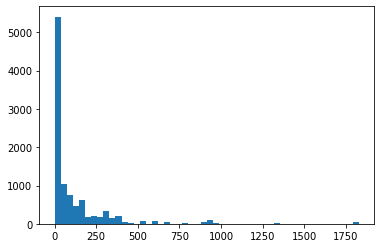

In [33]:
energy = datacon['energySiteEUI'].values

plt.hist(energy,bins =50)
plt.show()


In [34]:
# Delete rows with zeros 
dataNoZero = datacon[(datacon['energySiteEUI']==0) == False]
dataNoZero.shape

(4917, 7)

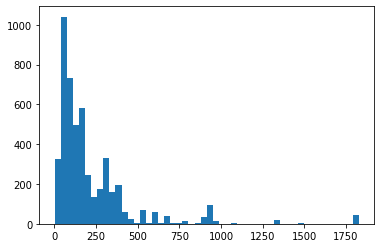

In [35]:
energy = dataNoZero['energySiteEUI']
temp = energy.values
plt.hist(temp,bins=50)
plt.show()

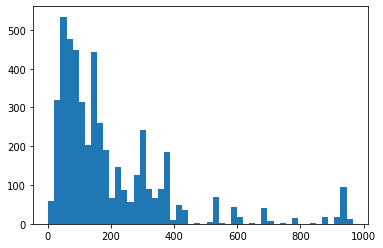

In [36]:
## Delete rows with Outliers 

dataNoOutliers = dataNoZero[(dataNoZero['energySiteEUI']>1000) == False]

energy = dataNoOutliers['energySiteEUI']
temp = energy.values
plt.hist(temp,bins=50)
plt.show()

In [37]:
dataNoOutliers['energySiteEUI'].describe()

count    4852.000000
mean      197.470944
std       190.263169
min         1.900000
25%        72.475000
50%       144.100000
75%       276.400000
max       965.300000
Name: energySiteEUI, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


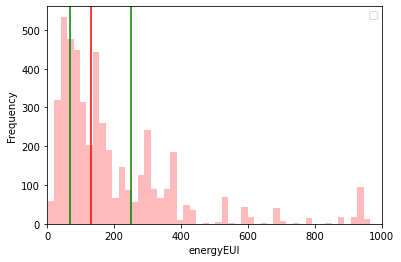

In [38]:
y = energy.values
plt.hist(y,bins = 50,color="#FFBBBB")
plt.axvline(68.800000,c="green")
plt.axvline(130.900000,c="red")
plt.axvline(250.000000,c="green")
plt.xlabel("energyEUI")
plt.ylabel("Frequency")
plt.xlim(0, 1000)
plt.legend()
plt.show()

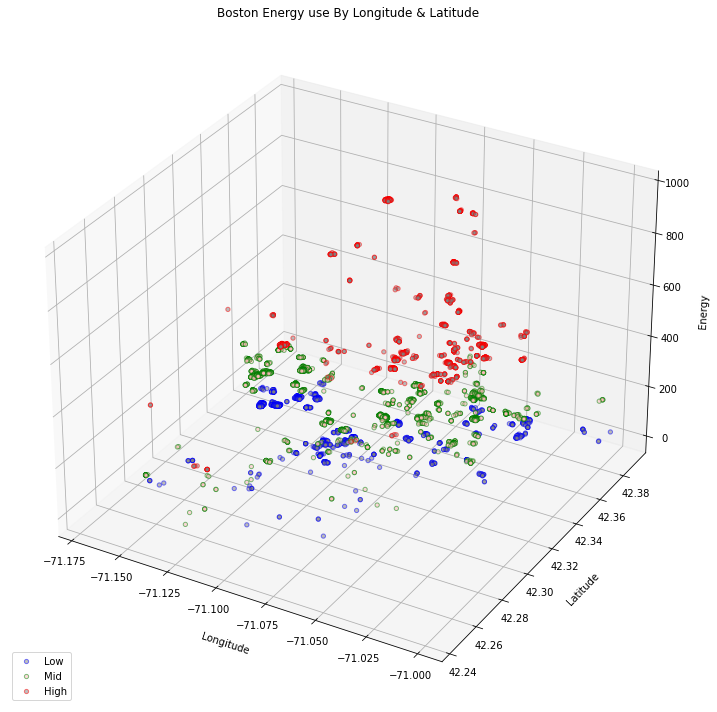

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors

fig = plt.figure(figsize=(35,10))

#Project onto axes: 1, 2, 3
ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

newData = pd.DataFrame()
newData['Longitude'] = dataNoOutliers['Longitude']
newData['Latitude'] = dataNoOutliers['Latitude']
newData['y'] = y

newData1 = newData[newData['y']<68.8]
newData2 = newData[(newData['y']>68.8 )&(newData['y']<250)]
newData3 = newData[250<newData['y']]


ax1.scatter(newData1['Longitude'], newData1['Latitude'],newData1['y'], label='Low' , facecolors = "gray",edgecolors = "blue",alpha = 0.5, s=18)
ax1.scatter(newData2['Longitude'], newData2['Latitude'],newData2['y'], label='Mid' , facecolors = "#FFBBBB",edgecolors = "green",alpha = 0.5, s=18)
ax1.scatter(newData3['Longitude'], newData3['Latitude'],newData3['y'], label='High' , facecolors = "gray",edgecolors = "red",alpha = 0.5, s=18)


ax1.set_xlabel('\n'+'\n' + 'Longitude')
ax1.set_ylabel('\n'+'\n' +'Latitude')
ax1.set_zlabel('\n'+'\n' +'Energy')
ax1.set_title('Boston Energy use By Longitude & Latitude')
ax1.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [40]:
def SavePandasToCSV(d, path):
    d.to_csv(path)
    return "done!!"

In [41]:
SavePandasToCSV(dataNoOutliers, "./data/energyFrom_Trulia.csv")

'done!!'